# Hard SVM (Support vector machine) using convex Quadratic program 

## Step 1: Import All required Libraries

In [153]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_blobs
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers
import matplotlib.pyplot as plt
from random import shuffle

## Step 2: Read CSV file (For this i have uploded the file on google colab) 

In [154]:
df = pd.read_csv("IRIS.csv")
df = df[df["species"]!="Iris-setosa"]
print(df,df.shape)

     sepal_length  sepal_width  petal_length  petal_width          species
50            7.0          3.2           4.7          1.4  Iris-versicolor
51            6.4          3.2           4.5          1.5  Iris-versicolor
52            6.9          3.1           4.9          1.5  Iris-versicolor
53            5.5          2.3           4.0          1.3  Iris-versicolor
54            6.5          2.8           4.6          1.5  Iris-versicolor
..            ...          ...           ...          ...              ...
145           6.7          3.0           5.2          2.3   Iris-virginica
146           6.3          2.5           5.0          1.9   Iris-virginica
147           6.5          3.0           5.2          2.0   Iris-virginica
148           6.2          3.4           5.4          2.3   Iris-virginica
149           5.9          3.0           5.1          1.8   Iris-virginica

[100 rows x 5 columns] (100, 5)


## Step 3: Store the features and target in X , Y seperately and since target has labels changing labels 1 to -1 

In [155]:
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1:].to_numpy()
print(X.shape,X.flatten())
y[y!="Iris-versicolor"]=-1
y[y=="Iris-versicolor"]=1
print(y.shape,y.flatten())


(100, 4) [7.  3.2 4.7 1.4 6.4 3.2 4.5 1.5 6.9 3.1 4.9 1.5 5.5 2.3 4.  1.3 6.5 2.8
 4.6 1.5 5.7 2.8 4.5 1.3 6.3 3.3 4.7 1.6 4.9 2.4 3.3 1.  6.6 2.9 4.6 1.3
 5.2 2.7 3.9 1.4 5.  2.  3.5 1.  5.9 3.  4.2 1.5 6.  2.2 4.  1.  6.1 2.9
 4.7 1.4 5.6 2.9 3.6 1.3 6.7 3.1 4.4 1.4 5.6 3.  4.5 1.5 5.8 2.7 4.1 1.
 6.2 2.2 4.5 1.5 5.6 2.5 3.9 1.1 5.9 3.2 4.8 1.8 6.1 2.8 4.  1.3 6.3 2.5
 4.9 1.5 6.1 2.8 4.7 1.2 6.4 2.9 4.3 1.3 6.6 3.  4.4 1.4 6.8 2.8 4.8 1.4
 6.7 3.  5.  1.7 6.  2.9 4.5 1.5 5.7 2.6 3.5 1.  5.5 2.4 3.8 1.1 5.5 2.4
 3.7 1.  5.8 2.7 3.9 1.2 6.  2.7 5.1 1.6 5.4 3.  4.5 1.5 6.  3.4 4.5 1.6
 6.7 3.1 4.7 1.5 6.3 2.3 4.4 1.3 5.6 3.  4.1 1.3 5.5 2.5 4.  1.3 5.5 2.6
 4.4 1.2 6.1 3.  4.6 1.4 5.8 2.6 4.  1.2 5.  2.3 3.3 1.  5.6 2.7 4.2 1.3
 5.7 3.  4.2 1.2 5.7 2.9 4.2 1.3 6.2 2.9 4.3 1.3 5.1 2.5 3.  1.1 5.7 2.8
 4.1 1.3 6.3 3.3 6.  2.5 5.8 2.7 5.1 1.9 7.1 3.  5.9 2.1 6.3 2.9 5.6 1.8
 6.5 3.  5.8 2.2 7.6 3.  6.6 2.1 4.9 2.5 4.5 1.7 7.3 2.9 6.3 1.8 6.7 2.5
 5.8 1.8 7.2 3.6 6.1 2.5 6.5 3.2 5.1 2.  6.

## Step 4: Processing the Data and Splitting


In [156]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.7       , 0.66666667, 0.43589744, 0.26666667],
       [0.5       , 0.66666667, 0.38461538, 0.33333333],
       [0.66666667, 0.61111111, 0.48717949, 0.33333333],
       [0.2       , 0.16666667, 0.25641026, 0.2       ],
       [0.53333333, 0.44444444, 0.41025641, 0.33333333],
       [0.26666667, 0.44444444, 0.38461538, 0.2       ],
       [0.46666667, 0.72222222, 0.43589744, 0.4       ],
       [0.        , 0.22222222, 0.07692308, 0.        ],
       [0.56666667, 0.5       , 0.41025641, 0.2       ],
       [0.1       , 0.38888889, 0.23076923, 0.26666667],
       [0.03333333, 0.        , 0.12820513, 0.        ],
       [0.33333333, 0.55555556, 0.30769231, 0.33333333],
       [0.36666667, 0.11111111, 0.25641026, 0.        ],
       [0.4       , 0.5       , 0.43589744, 0.26666667],
       [0.23333333, 0.5       , 0.15384615, 0.2       ],
       [0.6       , 0.61111111, 0.35897436, 0.26666667],
       [0.23333333, 0.55555556, 0.38461538, 0.33333333],
       [0.3       , 0.38888889,

A. Split the data in 70,30 for training and testing the model 

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80, 4) (20, 4) (80, 1) (20, 1)


## Step 5: Optimizing the weight vector w using the cvxopt_solvers.
### Create H where Hi,j=y(i)y(j)<x(i)x(j)>
### Calculate w=∑y(i)α(i)x(i)
### Determine the set of support vectors S by finding the indices such that αi>0
### For each new point x′ classify according to y′=sign(wTx′+b)

In [158]:
# Initializing values of m,n and computing gram matrix.
samples,features = X_train.shape
y_train = y_train.reshape(-1,1)
H = np.dot((y_train*X_train),(y_train*X_train).T)
H = H.astype(np.double)

# Converting into cvxopt format
P = cvxopt_matrix(H)
q = cvxopt_matrix(np.repeat([-1.0], samples)[..., None])
G = cvxopt_matrix(np.negative(np.eye(samples)))
h = cvxopt_matrix(np.zeros(samples))
A = cvxopt_matrix(y_train.reshape(1, -1).astype(np.double))
b = cvxopt_matrix(0.0)
cvxopt_solvers.options['show_progress']=True

## Step 6: Running the solver and printing the values of solution 

In [159]:
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])
print(sol,alphas.flatten()) 

     pcost       dcost       gap    pres   dres
 0: -2.3169e+01 -6.0719e+01  3e+02  1e+01  2e+00
 1: -5.1773e+01 -9.6962e+01  2e+02  8e+00  1e+00
 2: -2.0038e+02 -2.9125e+02  2e+02  7e+00  1e+00
 3: -6.7773e+02 -7.9296e+02  2e+02  6e+00  1e+00
 4: -2.2032e+03 -2.3928e+03  4e+02  6e+00  1e+00
 5: -3.5404e+03 -3.9980e+03  7e+02  6e+00  9e-01
 6: -5.8002e+03 -7.0922e+03  2e+03  5e+00  8e-01
 7: -8.1563e+03 -9.9937e+03  2e+03  2e+00  4e-01
 8: -8.5851e+03 -8.8251e+03  3e+02  2e-01  3e-02
 9: -8.5865e+03 -8.5890e+03  3e+00  2e-03  3e-04
10: -8.5865e+03 -8.5865e+03  3e-02  2e-05  3e-06
11: -8.5865e+03 -8.5865e+03  3e-04  2e-07  3e-08
12: -8.5865e+03 -8.5865e+03  3e-06  2e-09  3e-10
Optimal solution found.
{'x': <80x1 matrix, tc='d'>, 'y': <1x1 matrix, tc='d'>, 's': <80x1 matrix, tc='d'>, 'z': <80x1 matrix, tc='d'>, 'status': 'optimal', 'gap': 2.9775927859864974e-06, 'relative gap': 3.467774850857632e-10, 'primal objective': -8586.46513700304, 'dual objective': -8586.465139541475, 'primal inf

## Calculating W and b Displaying results

In [160]:
# w parameter using alphas 
w = np.dot((y_train * alphas).T,X_train)[0]

# Selecting the set of indices S corresponding to non zero parameters
S = (alphas > 1e-4).flatten()

#Computing b of non zero paprameters
b = y_train[S] - np.dot(X_train[S], w.reshape(-1,1))
b = sum(b)/len(b)

# Display results
print('Alphas = ',alphas[alphas > 1e-4])
print('w = ', w.flatten())
print('b = ', b)

Alphas =  [ 776.46201815 5525.66718564 3060.79795009 3043.76832211 4766.23479546]
w =  [20.59701492253139 24.179104473695237 -117.5820895346049
 -48.35820894827246]
b =  [58.07462685715937]


## Printing all support vectors

In [161]:
X_Support_vectors = X_train[S]
y_support_vectors = y_train[S]
print(alphas,'\n',"Support vectors are : = ",X_Support_vectors,'\n','\n',"Number of Support vectors are: ",len(X_Support_vectors))

[[-6.20221458e-11]
 [-1.52637435e-10]
 [-6.97845107e-11]
 [-2.28998311e-11]
 [-2.18197662e-11]
 [ 1.89891081e-10]
 [-8.15828730e-11]
 [ 7.76462018e+02]
 [ 6.20339854e-11]
 [ 6.65436116e-11]
 [-3.93404392e-11]
 [-1.00822473e-10]
 [-5.45836886e-11]
 [-8.95913851e-11]
 [ 5.52566719e+03]
 [ 3.93505366e-11]
 [-3.84133220e-11]
 [-7.30195948e-11]
 [-3.00947653e-12]
 [ 9.99754916e-10]
 [-9.27416666e-11]
 [ 4.28884502e-12]
 [-2.10116541e-10]
 [-6.89779226e-11]
 [ 3.06079795e+03]
 [ 1.08280936e-10]
 [ 4.03301950e-11]
 [-2.03972069e-10]
 [-5.50823310e-11]
 [-1.01819988e-10]
 [-2.62305136e-11]
 [ 2.96382696e-13]
 [-3.83798359e-11]
 [-5.55347485e-13]
 [ 8.04118591e-11]
 [ 3.65716821e-11]
 [-3.38315173e-11]
 [ 3.59190945e-12]
 [ 1.62739460e-11]
 [-5.36444278e-11]
 [-2.31816173e-11]
 [ 3.46436239e-11]
 [-5.81018357e-11]
 [-1.66268874e-11]
 [-1.12076104e-11]
 [-5.99036890e-11]
 [-3.66657761e-11]
 [-1.97489362e-10]
 [-8.58538296e-11]
 [-6.69514697e-11]
 [ 6.75427273e-11]
 [ 3.04376832e+03]
 [ 4.2540492

## Step 7: Creating target Array and calculating the target values.

In [162]:
target = np.where(np.dot(X_test,w)+b>=0.0,1,-1)
t = np.where(np.dot(X_train,w)+b>=0.0,1,-1)

## Step 8: Checking for Accuracy. 

In [163]:
v1 = 0  
v2 = 0
c = 0
i=0    
for c in range( np.size( target ) ) :  
  if y_test[c] == target[c] :            
    v1 = v1 + 1
  c = c + 1
for i in range( np.size( t ) ) :
  if y_train[i] == t[i] :            
    v2 = v2 + 1
  i = i + 1
print("Accuracy of Defined Model on test data :",(v1/c)*100)     
print("Accuracy of Defined Model on train data:",(v2/i)*100)   

Accuracy of Defined Model on test data : 95.0
Accuracy of Defined Model on train data: 100.0


# For Any randomly generated Linear separable data we can see the working of hard svm as:

(700, 2) (300, 2) (700,) (300,)


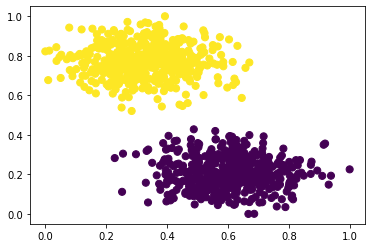

In [164]:
# generating linearly separable data.
x, y = make_blobs(n_samples = 1000, centers = 2, random_state = 0, cluster_std = 0.50)
y[y==0]=-1
# changing some points to irregular or impurities
for i in range(len(y)):
  if y[i] == -1 :
    y[i]=1
  else:
    y[i]=-1
  i=i**2
# pre processing the data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x)
x_scale
X_train, X_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# plotting the data
plt.scatter(x_scale[:, 0], x_scale[:, 1], c = y, s = 50)

In [165]:
# Initializing values of m,n and computing gram matrix.
samples,features = X_train.shape
y_train = y_train.reshape(-1,1)
H = np.dot((y_train*X_train),(y_train*X_train).T)

# Converting into cvxopt format
P = cvxopt_matrix(H)
q = cvxopt_matrix(np.repeat([-1.0], samples)[..., None])
G = cvxopt_matrix(np.negative(np.eye(samples)))
h = cvxopt_matrix(np.zeros(samples))
A = cvxopt_matrix(y_train.reshape(1, -1)*1.0)
b = cvxopt_matrix(0.0)
cvxopt_solvers.options['show_progress']=True

In [166]:
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])
print(sol,alphas.flatten()) 

     pcost       dcost       gap    pres   dres
 0: -5.2785e+01 -1.1052e+02  2e+03  4e+01  2e+00
 1: -4.8873e+01 -7.4035e+01  7e+02  1e+01  7e-01
 2: -8.1421e+01 -1.0235e+02  6e+02  1e+01  5e-01
 3: -2.4338e+02 -1.8213e+02  5e+02  6e+00  3e-01
 4: -1.2688e+02 -1.2851e+02  7e+01  7e-01  3e-02
 5: -1.1642e+02 -1.1689e+02  1e+00  1e-02  4e-04
 6: -1.1663e+02 -1.1666e+02  1e-01  7e-04  3e-05
 7: -1.1666e+02 -1.1666e+02  3e-03  1e-05  5e-07
 8: -1.1666e+02 -1.1666e+02  3e-05  1e-07  5e-09
 9: -1.1666e+02 -1.1666e+02  3e-07  1e-09  5e-11
Optimal solution found.
{'x': <700x1 matrix, tc='d'>, 'y': <1x1 matrix, tc='d'>, 's': <700x1 matrix, tc='d'>, 'z': <700x1 matrix, tc='d'>, 'status': 'optimal', 'gap': 2.622020560297984e-07, 'relative gap': 2.247617083864587e-09, 'primal objective': -116.65779634445748, 'dual objective': -116.65779649042895, 'primal infeasibility': 1.2197578211673499e-09, 'dual infeasibility': 5.3966335828080824e-11, 'primal slack': 5.3310323501099204e-11, 'dual slack': 2.569

In [167]:
# w parameter using alphas 
w = np.dot((y_train * alphas).T,X_train)[0]

# Selecting the set of indices S corresponding to non zero parameters
S = (alphas > 1e-4).flatten()

#Computing b of non zero paprameters
b = y_train[S] - np.dot(X_train[S], w.reshape(-1,1))
b = sum(b)/len(b)

# Display results
print('Alphas = ',alphas[alphas > 1e-4])
print('w = ', w.flatten())
print('b = ', b)
X_Support_vectors = X_train[S]
y_support_vectors = y_train[S]
print(alphas.flatten(),'\n',"Support vectors are : = ",X_Support_vectors.flatten(),'\n','\n',"Number of Support vectors are: ",len(X_Support_vectors))

Alphas =  [ 79.50072855 116.65779639  37.15704576]
w =  [-2.49737947 15.06913032]
b =  [-6.23093325]
[3.16080842e-11 4.85492476e-11 2.29400972e-11 3.77300439e-11
 1.68054952e-11 4.34505767e-11 6.09955223e-11 4.95582164e-11
 6.40326862e-11 1.99644857e-11 6.33721137e-11 2.81603610e-11
 3.05961409e-11 4.30645417e-11 2.33277709e-11 6.88106535e-11
 6.91173724e-11 2.54373980e-11 6.18286098e-11 1.08376799e-10
 4.68313529e-11 2.12636925e-11 2.41159880e-11 5.53770357e-11
 4.64977758e-11 6.44753687e-11 1.14591460e-10 4.71672574e-11
 3.17646180e-11 7.37625684e-11 4.14628667e-11 8.76017910e-12
 1.97732215e-11 4.40040460e-11 5.74616290e-11 4.34538499e-11
 3.97649393e-11 2.61502765e-11 4.95609752e-11 7.50870030e-11
 4.79556652e-11 8.68858636e-11 4.57823339e-11 9.64498553e-11
 2.34343589e-11 6.80759844e-11 3.60842865e-11 4.23400896e-11
 1.25220865e-10 2.98796204e-11 3.96672945e-11 1.27061233e-11
 4.97967367e-11 9.80558447e-11 4.82445325e-11 7.20779036e-12
 4.98935192e-11 3.86149529e-11 2.70809924e-11

In [168]:
target = np.where(np.dot(X_test,w)+b>=0.0,1,-1)
t = np.where(np.dot(X_train,w)+b>=0.0,1,-1)
v1 = 0  
v2 = 0
c = 0
i=0    
for c in range( np.size( target ) ) :  
  if y_test[c] == target[c] :            
    v1 = v1 + 1
  c = c + 1 
for i in range( np.size( t ) ) :
  if y_train[i] == t[i] :            
    v2 = v2 + 1
  i = i + 1
print("Accuracy of Defined Model on test data :",(v1/c)*100)     
print("Accuracy of Defined Model on train data:",(v2/i)*100)   

Accuracy of Defined Model on test data : 100.0
Accuracy of Defined Model on train data: 100.0


## plotting the SVM hyperplane and margin planes

A. For training data

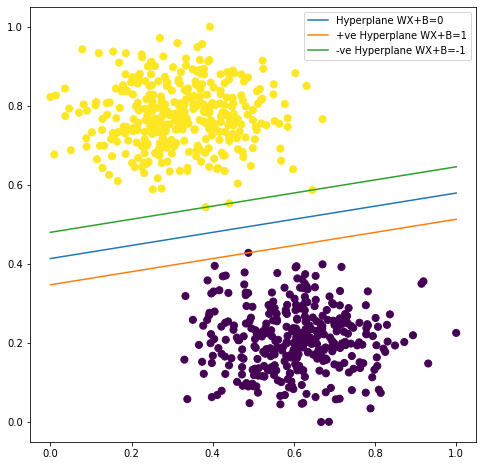

In [169]:
def plotHyperplane(w1, w2, b):
  plt.figure(figsize=(8, 8))
  x_1 = np.linspace(0, 1, 10)
  x_2 = -(w1*x_1+b)/w2 # WT + B = 0 
  x_p = -(w1*x_1+b+1)/w2 # WT + B = -1
  x_n = -(w1*x_1+b-1)/w2 # WT + B = +1
  plt.plot(x_1, x_2, label="Hyperplane WX+B=0")
  plt.plot(x_1, x_p, label="+ve Hyperplane WX+B=1")
  plt.plot(x_1, x_n, label="-ve Hyperplane WX+B=-1")
  plt.legend()
  plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, s = 50)
  plt.show()
plotHyperplane(w[0], w[1], b)

B. For testing data

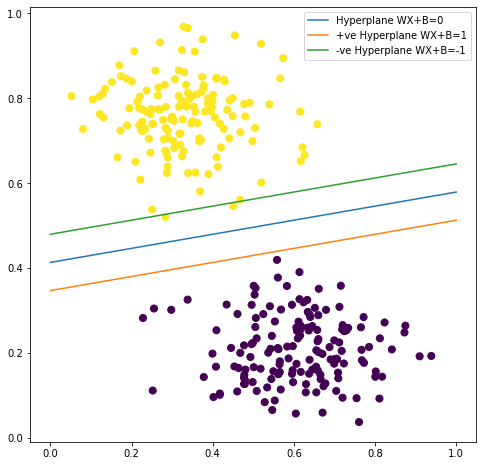

In [170]:
def plotHyperplane(w1, w2, b):
  plt.figure(figsize=(8, 8))
  x_1 = np.linspace(0, 1, 10)
  x_2 = -(w1*x_1+b)/w2 # WT + B = 0 
  x_p = -(w1*x_1+b+1)/w2 # WT + B = -1
  x_n = -(w1*x_1+b-1)/w2 # WT + B = +1
  plt.plot(x_1, x_2, label="Hyperplane WX+B=0")
  plt.plot(x_1, x_p, label="+ve Hyperplane WX+B=1")
  plt.plot(x_1, x_n, label="-ve Hyperplane WX+B=-1")
  plt.legend()
  plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, s = 50)
  plt.show()
plotHyperplane(w[0], w[1], b)

# Hence we can see that the hard SVM on Linearly separable data gives 100% accuracy and on non linearly separable data it gives less effeciency.